# Linear Regression
***
## Linear Regression with One Variable

Read the data into a pandas dataframe.

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

data1 = pd.read_csv('ex1data1.txt', names=['Population', 'Profit'])
data1.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

### Plotting the Data

Visualize the data.

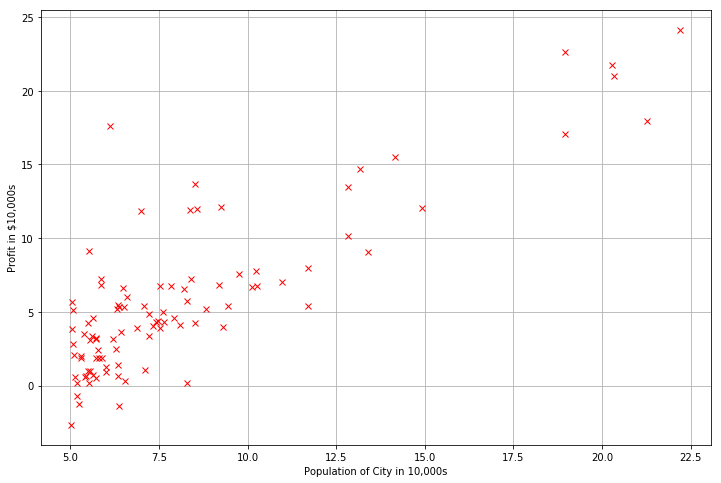

In [2]:
plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx')

### Gradient Descent

Fit the linear regression parameters $\theta$ to the dataset using gradient descent.

#### Update Equations

The objective of linear regression is to minimize the cost function

$J(\theta)=\frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$

where the hypothesis $h_{\theta}(x)$ is given by the linear model

$h_{\theta}(x)=\theta^{T} x=\theta_0+\theta_1x_1$

The parameters of the model are the $\theta_j$ values. These values will be adjusted to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$\theta_j:=\theta_j-\alpha\frac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$ (Simultaneously update $\theta_j$ for all $j$)

With each step of gradient descent, the parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

#### Implementation

Add another one dimension to the data to accommodate the $\theta_0$ intercept term and initialize $\theta_j$ to $0$.

In [3]:
# Get the number of features.
n = len(data1.columns)-1 # subtract the target column

# Create a function to pepare the data.
def prepareData(data, n):
    """
    Add 1s column, convert to matrices,
    initialize theta.
    Args:
        data: read the data file
        n: int
    Returns:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    """
    # Add a column with 1s in the data set.
    data.insert(0, 'Ones', 1)

    # Define X and y, separating the data set.
    x = data.iloc[:, 0:n+1]
    y = data.iloc[:, n+1:n+2]

    # Convert to matrices and initialize parameters theta to 0s.
    # Theta is a vector [n + 1 x 1] and Theta Transpose is a vector [1 x n+1],
    # where n is the number of features.
    x = np.matrix(x.values)
    y = np.matrix(y.values)
    theta = np.matrix(np.zeros((n+1, 1)))
    return x, y, theta

x, y, theta = prepareData(data1, n)

Initialize the learning rate $\alpha$ to 0.01 and the iterations to 1500.

In [4]:
# Initialize parameters for iterations and learning rate α.
iterations = 1500
alpha = 0.01

# Check the dimensions of the matrices.
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (2, 1))

#### Computing the Cost $J(\theta)$

Performing gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor also the convergence by computing the cost. Implement a function to calculate $J(\theta)$ and check the convergence of gradient descent implementation.

In [5]:
# Create a function to compute cost.
def computeCost(x, y, theta):
    """
    Compute the cost function.
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
        theta: a n+1 by 1 vector
    Returns:
        cost: float
    """
    m = len(x)
    cost = np.sum(np.square((x * theta) - y)) / (2 * m)
    return cost

computeCost(x, y, theta)

32.072733877455676

#### Gradient Descent

Implement gradient descent with a loop structure. The cost $J(\theta)$ is parameterized by the vector $\theta$, not $x$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $x$ or $y$. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. After the correct implementation of gradient descent and computeCost, the value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm. The final parameters will be used to plot the linear fit and make predictions on profits in areas of 35,000 and 70,000 people.

In [6]:
# Create a function to implement gradient descent.
def gradientDescent(x, theta, iterations):
    """
    Implement gradient descent.
    Args:
        x: a m by n+1 matrix
        theta: a n+1 by 1 vector
    Returns:
        theta: a n+1 by 1 vector
        J_vals: a #iterations by 1 vector
    """
    m = len(x)
    J_vals = []
    
    for i in range(iterations):
        error = (x * theta) - y
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
    return (theta, J_vals)

theta, J_vals = gradientDescent(x, theta, iterations)

#### Plot the Fit Line

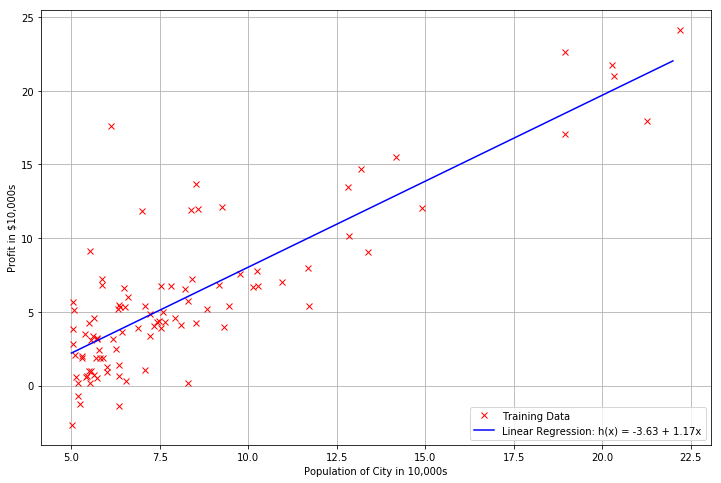

In [7]:
theta_f = list(theta.flat)
xs = np.arange(5, 23)
ys = theta_f[0] + theta_f[1] * xs

plt.figure(figsize=(12, 8))
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()
plt.plot(data1.Population, data1.Profit, 'rx', label='Training Data')
plt.plot(xs, ys, 'b-', label='Linear Regression: h(x) = %0.2f + %0.2fx'%(theta[0], theta[1]))
plt.legend(loc=4)

#### Predictions

In [8]:
# Predict the profit for population of 35000 and 70000.
print((theta_f[0] + theta_f[1] * 3.5) * 10000)
print((theta_f[0] + theta_f[1] * 7) * 10000)

4519.7678677
45342.4501294


#### Visualizing $J(\theta)$

Plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values to better understand the cost function $J(\theta)$.

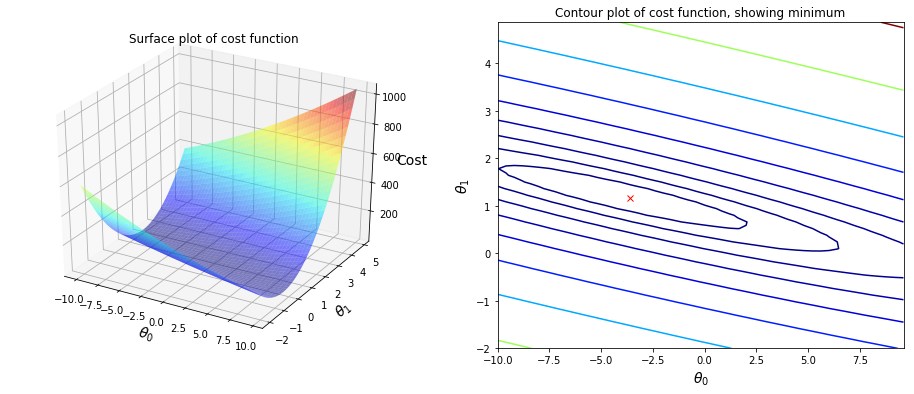

In [9]:
from mpl_toolkits.mplot3d import axes3d

# Create meshgrid.
xs = np.arange(-10, 10, 0.4)
ys = np.arange(-2, 5, 0.14)
xx, yy = np.meshgrid(xs, ys)

# Initialize J values to a matrix of 0's.
J_vals = np.zeros((xs.size, ys.size))

# Fill out J values.
for index, v in np.ndenumerate(J_vals):
    J_vals[index] = computeCost(x, y, [[xx[index]], [yy[index]]])

# Create a set of subplots.
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Create surface plot.
ax1.plot_surface(xx, yy, J_vals, alpha=0.5, cmap='jet')
ax1.set_zlabel('Cost', fontsize=14)
ax1.set_title('Surface plot of cost function')

# Create contour plot.
ax2.contour(xx, yy, J_vals, np.logspace(-2, 3, 20), cmap='jet')
ax2.plot(theta_f[0], theta_f[1], 'rx')
ax2.set_title('Contour plot of cost function, showing minimum')

# Create labels for both plots.
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=14)
    ax.set_ylabel(r'$\theta_1$', fontsize=14)

## Linear Regression with Multiple Variables

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [10]:
data2 = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])
data2.describe()

Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000

### Feature Normalization

Load and display some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly:

* Subtract the mean value of each feature from the dataset.
* After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

In [11]:
# Normalize features, but NOT target price!
data2.iloc[:, 0:2] = data2.iloc[:, 0:2].apply(lambda x: (x - np.mean(x)) / np.std(x))
data2.describe()

Size      Bedrooms          Price
count  4.700000e+01  4.700000e+01      47.000000
mean  -9.448707e-18  2.480285e-16  340412.659574
std    1.010811e+00  1.010811e+00  125039.899586
min   -1.461049e+00 -2.882690e+00  169900.000000
25%   -7.233261e-01 -2.260934e-01  249900.000000
50%   -1.433229e-01 -2.260934e-01  299900.000000
75%    3.412850e-01  1.102205e+00  384450.000000
max    3.150993e+00  2.430504e+00  699900.000000

### Gradient Descent

Previously, gradient descent was implemented on a univariate regression problem. The only difference now is that there is one more feature in the matrix $x$. The hypothesis function and the batch gradient descent update rule remain unchanged. The code in the previous single variable part already supports multiple variables and can be used here too.

In [12]:
n = len(data2.columns)-1
x, y, theta = prepareData(data2, n)

In [13]:
# Initialize learning rate α.
alpha = 0.15

# Check the dimensions of the matrices.
x.shape, y.shape, theta.shape

((47, 3), (47, 1), (3, 1))

### Selecting Learning Rates

A learning rate that converges quickly shall be found. Gradient descent will be run for 50 iterations at the chosen learning rate. The `gradientDescent` function also returns the history of $J(\theta)$ values in a vector `J_vals`. Finally, the J values are plotted against the number of the iterations. A learning rate within a good range is depicted in the following graph.

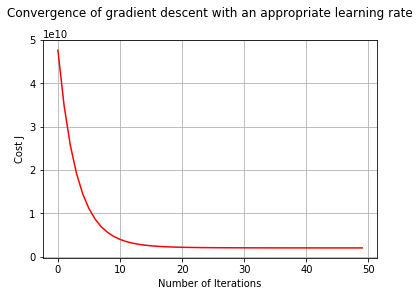

In [14]:
theta, J_vals = gradientDescent(x, theta, iterations=50)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent with an appropriate learning rate', y=1.08)
plt.grid()
plt.plot(range(50), J_vals, 'r')

#### Make a Prediction

Make a price prediction for a 1650-square-foot house with 3 bedrooms.

In [15]:
# Predict the price for a 1650-square-foot house with 3 bedrooms.
# First normalize features using the std and mean values.
size = (1650 - 2000.680851) / 794.702354
bedrooms = (3 - 3.170213) / 0.760982
theta_f = list(theta.flat)
print('Price: $', (theta_f[0] + theta_f[1] * size + theta_f[2] * bedrooms))

Price: $ 293902.416048


### Normal Equations

The closed-form solution to linear regression is

$\theta=(X^{T}X)^{-1}X^{T}y$

This formula does not require any feature scaling and gives an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. It is still needed to add a column of 1’s to the $X$ matrix to have an intercept term $\theta_0$.

In [16]:
from numpy.linalg import inv

data2 = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])
n = len(data2.columns)-1
x, y, theta = prepareData(data2, n)

# Create the normal equation.
def normalEquation(x, y):
    """
    Get the analytical solution to linear regression,
    using the normal equation.
    Args:
        x: a m by n+1 matrix
        y: a m by 1 vector
    Returns:
        theta: a n+1 by 1 vector
    """
    theta = np.dot(np.dot(inv(np.dot(x.T, x)), x.T), y)
    return theta

theta = normalEquation(x, y)

#### Check Prediction

Make the same prediction for a 1650-square-foot house with 3 bedrooms to check the analytical solutions.

In [17]:
# No need to normalize the features now!
theta_f = list(theta.flat)
print('Price: $', (theta_f[0] + theta_f[1] * 1650 + theta_f[2] * 3))

Price: $ 293081.464335


As it was expected, the predicted price with the normal equation is pretty similar to the one using the model fit with gradient descent.